<a href="https://colab.research.google.com/github/rajputvivek07/Data-Analysis/blob/main/Vivek_DA_EXP8_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OEIT6, Data Analytics, 2022

# **Lab 6: Support Vector Machine**  

---

Name : Vivek Rajput

UID No. : 2019110046

Class : BE ETRX

Date : 30/11/2022

---
**Objective: **
> Understanding Support Vector Machine algorithm through building SVM algorithm in Python 
Introduction 

> An SVM is a numeric classifier. That means that all of the features of the data must be numeric, not symbolic. 
Furthermore, in this class, we'll assume that the SVM is a binary classifier: that is, it classifies points as one of 
two classifications. We'll typically call the classifications "+" and " -".  
A trained SVM is defined by two values:  
>> • A normal vector w (also called the weight vector), which solely determines the shape and direction of the 
decision boundary.  

>> • A scalar offset b, which solely determines the position of the decision boundary with respect to the origin.  
A trained SVM can then classify a point x by computing w · x + b. If this value is positive, x is classified as +; 
otherwise, x is classified as -.  

> The decision boundary is coerced by support vectors, so called because these vectors (data points) support the 
boundary: if any of these points are moved or eliminated, the decision boundary changes! All support vectors lie 
on a gutter, which can be thought of as a line running parallel to the decision boundary. There are two gutters: 
one gutter hosts positive support vectors, and the other, negative support vectors.  
> Note that, though a support vector is always on a gutter, it's not necessarily true that every data point on a gutter 
is a support vector.  
> Below are the five principle SVM equations, as taught in lecture and recitation. Equations 1-3 define the decision 
boundary and the margin width, while Equations 4 and 5 can be used to calculate the alpha (supportiveness) 
values for the training points.  


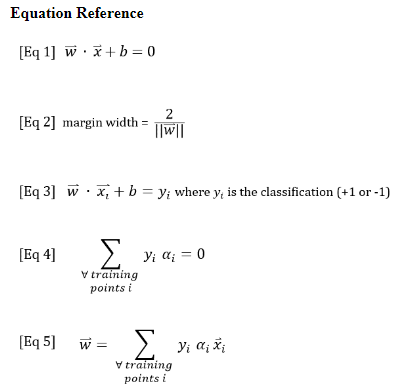


---



In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
 
%matplotlib inline  
# We'll define a function to draw a nice plot of an SVM 
def plot_svc(svc, X, y, h=0.02, pad=0.25): 
  x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad 
  y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad 
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max))
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
  Z = Z.reshape(xx.shape) 
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)  
  plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
  # Support vectors indicated in plot by vertical lines 
  sv = svc.support_vectors_ 
  plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1') 
  plt.xlim(x_min, x_max) 
  plt.ylim(y_min, y_max) 
  plt.xlabel('X1') 
  plt.ylabel('X2') 
  plt.show() 
  print('Number of support vectors: ', svc.support_.size)

# 1. Support Vector  Machines 



In  this  lab,  we’ll  use  the  SVC  module  from  the  sklearn.svm  package  to  demonstrate  the  support 
vector classifier and the SVM: 

---



In [ ]:
from sklearn.svm import SVC 



---


# 2. Support vector Classifier 

The SVC() function can be used to fit a support vector classifier when the argument kernel =
”linear” is used. This function uses a slightly different formulation of the equationswe saw in
lecture to build the support vector classifier. The c argument allows us to specify the cost of a violation
to the margin. When the c argument is small, then the margins will be wide and many support vectors
will be on the margin or will violate the margin. When the c argumentis large, then the margins will be
narrow and there will be few support vectors on the margin orviolating the margin.
We can use the SVC() function to fit the support vector classifier for a given value of the cost parameter.
Here we demonstrate the use of this function on a two-dimensional example so thatwe can plot the
resulting decision boundary. Let’s start by generating a set of observations, which belong to two classes:


In [ ]:
np.random.seed(5) 
X = np.random.randn(20,2) 
y = np.repeat([1,-1], 10) 
 
X[y == -1] = X[y == -1] +1 
 

Let's plot the data to see whether the classes are linearly separable:

Text(0, 0.5, 'X2')

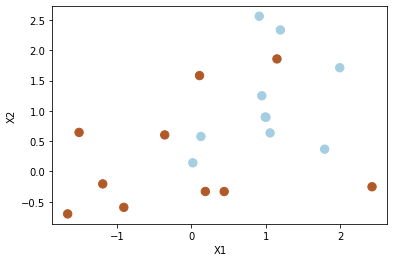

In [ ]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1') 
plt.ylabel('X2') 

Linear or Non Linear? 


Data is Non Linear


 
Next,  we fit the  support  vector  classifier:

In [ ]:
svc = SVC(C=1, kernel='linear') 
svc.fit(X, y) 
 

SVC(C=1, kernel='linear')

We  can  now  plot  the  support  vector  classifier  by  calling  the  plot_svc() function  on  the  output of the 
call to SVC(), as well as the data used in the call to SVC(): 

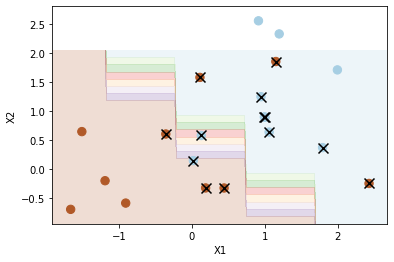

Number of support vectors:  13


In [ ]:
plot_svc(svc, X, y) 

Number of Support vectors? 

There are 13 support vectors

The region of feature space that will be assigned to the  1 class is shown in light blue, and the region that 
will be assigned to the +1 class is shown in  brown. The decision boundary between the two  classes  is 
linear (because we used the argument kernel = ”linear”). 
 
The support vectors are  plotted  with crosses and the remaining observations are plotted as  circles;  we  see 
here that there are 13 support vectors.  We can determine their identities as follows: 
 

In [ ]:
svc.support_ 
 

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

What  if  we  instead  used  a  smaller  value  of  the  cost  parameter? 

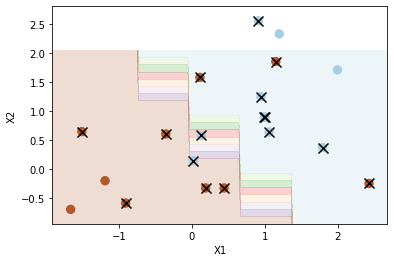

Number of support vectors:  16


In [ ]:
svc2 = SVC(C=0.1, kernel='linear') 
svc2.fit(X, y) 
plot_svc(svc2, X, y) 


Number of support vectors?

Number of support vectors increased to 16

 
 
 
Now that a smaller value of the c parameter is being used, we obtain a  larger  number  of support vectors, 
because the margin is now wider. 
 
The sklearn.grid_search module includes a a function GridSearchCV() to perform cross- validation. 
In  order  to  use  this  function,  we  pass  in  relevant  information  about  the  set  of  models that  are  under 
consideration.  The  following  command  indicates  that  we  want  perform  10-fold  cross-validation to 
compare SVMs with a linear kernel, using a range of values of the cost param- eter:

In [ ]:
from sklearn.model_selection import GridSearchCV 
 
# Select the optimal C parameter by cross-validation 
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}] 
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y) 

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

We can easily access the cross-validation errors for each of these models: 

In [ ]:
 clf.cv_results_

{'mean_fit_time': array([0.00081177, 0.00080786, 0.00069368, 0.00068941, 0.00071218,
        0.00093203, 0.00089893]),
 'std_fit_time': array([1.90451465e-04, 2.22449011e-04, 7.58357183e-05, 9.86691307e-05,
        5.97675434e-05, 4.29958341e-04, 1.49622740e-04]),
 'mean_score_time': array([0.00075788, 0.00053444, 0.0004189 , 0.00039904, 0.00041533,
        0.00075853, 0.00039737]),
 'std_score_time': array([8.71327788e-04, 2.11726443e-04, 3.61246242e-05, 6.18473649e-05,
        3.76207595e-05, 9.23527212e-04, 4.57782360e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0

The GridSearchCV() function stores the best parameters obtained, which can be accessed as follows: 

In [ ]:
clf.best_params_ 

{'C': 0.001}

 c=0.001  is  best  according  to  GridSearchCV. 
 
As usual, the predict() function can be used to predict the class label on a set of test observa- tions, at any 
given value of the cost parameter.  Let’s generate a test data set: 

In [ ]:
np.random.seed(1) 
X_test =  np.random.randn(20,2) 
y_test = np.random.choice([-1,1], 20) 
X_test[y_test == 1] = X_test[y_test == 1] -1  

Now we predict the class labels of these test observations. Here we use the best model obtained through 
cross-validation in order to make predictions

In [ ]:
svc2 = SVC(C=0.001, kernel='linear') 
svc2.fit(X, y) 
y_pred = svc2.predict(X_test) 
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


The value of True negative + True positive: 12+2=14.

Thus 14 observations are correctly classified.

With this value of c, 14 of the test observations are correctly classified. 
Now consider a situation in which the two classes are linearly separable. Then we can find a separating 
hyperplane  using  the  svm()  function.  First  we’ll  give  our  simulated  data  a  little  nudge so that they  are 
linearly separable: 

Text(0, 0.5, 'X2')

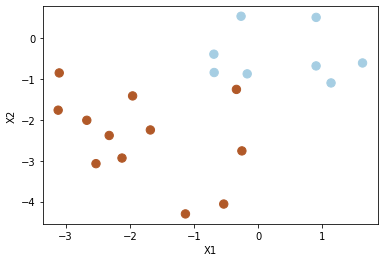

In [ ]:
X_test[y_test == 1] = X_test[y_test == 1] -1 
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired) 
plt.xlabel('X1') 
plt.ylabel('X2') 

Now the observations are just barely linearly separable. We fit the support vector classifier and plot 
the resulting hyperplane, using a very large value of cost so that no observations are misclassified. 

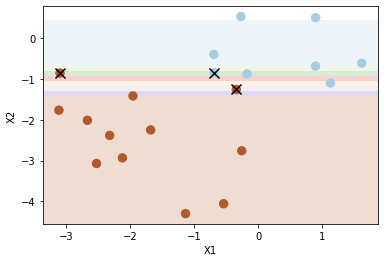

Number of support vectors:  3


In [ ]:
svc3 = SVC(C=1e5, kernel='linear') 
svc3.fit(X_test, y_test) 
plot_svc(svc3, X_test, y_test) 

Number of support vectors? 

Number of support vectors are 3


 
No  training  errors  were  made  and  only  three  support  vectors  were  used.  However,  we  can see from 
the figure that the margin is very narrow (because the observations that are not support vectors, indicated 
as circles,  are very close to the decision boundary).  It seems likely that this model will perform poorly on 
test data.  Let’s try a smaller value of cost: 

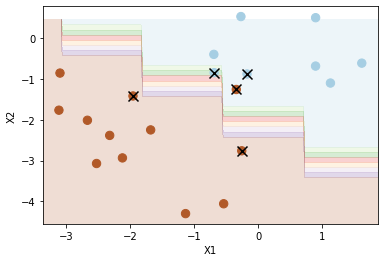

Number of support vectors:  5


In [ ]:
svc4 = SVC(C=1, kernel='linear') 
svc4.fit(X_test, y_test) 
plot_svc(svc4, X_test, y_test) 




Number of support vectors? 

Number of support vectors increased to 5

 
 
 
Using cost = 1, we misclassify a training observation, but we also obtain a much wider margin and  make 
use of five support vectors. It seems likely that this model will perform better on test data than the model 
with cost = 1e5. 

---


 

# Support Vector Machine

Support Vectore Machine: Kernel Method 

In order to fit an SVM using a non-linear kernel, we once again use the SVC() function. However, now we 
use a different value of the parameter kernel. To fit an SVM with a polynomial kernel we use kernel = 
”poly”, and to fit an SVM with a radial kernel we use kernel = ”rbf”. In the former case we also use the 
degree argument to specify a degree for the polynomial kernel, and in the latter case we use gamma to 
specify a value of γ for the radial basis kernel. 
Let’s  generate some  data  with  a  non-linear  class  boundary:

Text(0, 0.5, 'X2')

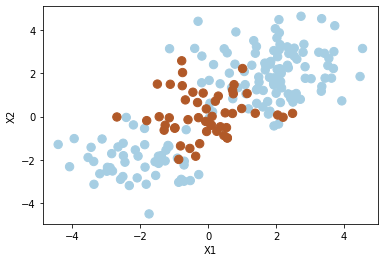

In [ ]:
from sklearn.model_selection import train_test_split 
np.random.seed(8) 
X = np.random.randn(200,2) 
X[:100] = X[:100] +2 
X[101:150] = X[101:150] -2 
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)]) 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Attempt to see how one class is kind of stuck in the middle of another class? This suggests that we 
might want to use a radial kernel in our SVM. Now let’s fit the training data using the SVC() function 
with a radial kernel and γ = 1: 

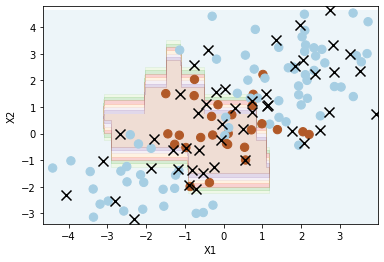

Number of support vectors:  51


In [ ]:
svm = SVC(C=1.0, kernel='rbf', gamma=1) 
svm.fit(X_train, y_train) 
plot_svc(svm, X_test, y_test) 

Number of support vectors? 

Number of support vectors are 51


 
The  plot  shows  that  the  resulting  SVM  has  a  decidedly  non-linear  boundary. We can see from the figure 
that there are a fair number of training errors in this SVM fit. If we increase the value of cost, we can reduce 
the number of training errors: 

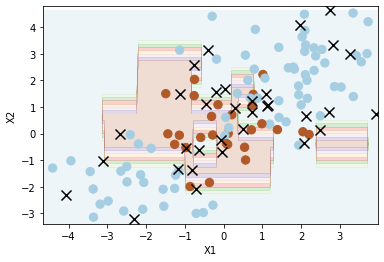

Number of support vectors:  36


In [ ]:
svm2 = SVC(C=100, kernel='rbf', gamma=1.0) 
svm2.fit(X_train, y_train) 
plot_svc(svm2, X_test, y_test) 

Number of support vectors:  36 
 
 
However, this comes at the price of a more irregular decision boundary that seems to be at risk 
of overfitting the data. We can perform cross-validation using GridSearchCV() to select the best choice 
of γ and cost for an SVM with a radial kernel: 

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100], 
'gamma': [0.5, 1,2,3,4]}] 
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train) 
clf.best_params_  

{'C': 10, 'gamma': 0.5}

Plot  the resulting  fit  using  the  plot_svc() function,  and  view  the  test  set  predictions  for  this  model  by applying the 
predict() function to the test data: 

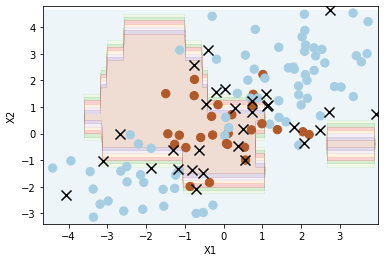

Number of support vectors:  32
[[66  7]
 [ 6 21]]
0.87


In [ ]:
plot_svc(clf.best_estimator_, X_test, y_test) 
print(confusion_matrix(y_test,  clf.best_estimator_.predict(X_test))) 
print(clf.best_estimator_.score(X_test, y_test))

Number of support vectors? 

Number of support vectors is 32

Test observations are correctly classified by this SVM?

87% of the test observations have been correctly classified
 


In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [ ]:

svm3 = SVC(C=1, kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [ ]:
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, gamma=50)

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

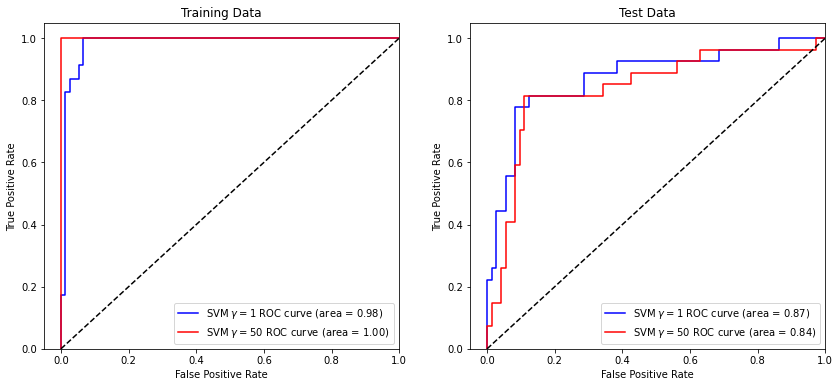

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")



---


From the ROC curve given we can derive the following inferences:
1. An accuracy of 87% was obtained using the values C=10 and gamma=0.5.

2. The ROC AUC plot with gamma=1 displays a training data area of 0.98 and a testing data area of 0.87.

3. The ROC AUC figure with gamma=50 displays a training data area of 1.00 and a testing data area of 0.84.

4. Both gamma levels are subject to trade-offs.

5. However, gamma=1 is chosen since, although having a lower AUC in training data, it has a higher AUC in testing. This demonstrates that the second model will function effectively when tested on real-world data.

6. As C grows, fewer support vectors are needed since the margin of error is lower.

7. The more the value of gamma, higher is the curvature of the function.A very high curvature can cause overfitting as depicted in the curve.

8. Hence an optimum value of C and gamma has to be decided using cross validation techniques for better performance.

---


